# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>


#### European Options

In the financial world, there exists a large variety of options. One of the most common is the so-called **european option**. Here, the writer sells the option to a holder that has the right to purchase (=call option) or sell (=put option) the underlying good for a prescribed price $K$ at a predefined expiry data $T$ in the future. 

#### Option Pricing

We assume that the development of the market value $S(t)$ of the underlying good can be described by **geometric Brownian motion**, a specific stochastic process denoted by $S \sim GBM(\mu, \sigma^2)$. In our case, $\mu$, the so-called drift, describes the general increasement of the market value that is equal to the risk-free interest rate $r$, while $\sigma$ is the volatility of $S(t)$. 
Thus, a european option is characterized by the following parameters:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$.

Obviously, these parameters can take abitrary values. Here, we state the values we will use for this exercise sheet.

The main question is: **What should be the price of a european option?** Theoretically, the price is given by:

$$C\left[ S(T),T \right] = \exp(-rT) \max(0, S(T) - K) \\
P\left[ S(T),T \right] = \exp(-rT) \max(0, K - S(T)), $$

for call and put option, respectively, where $\exp(rT)$ is the so-called discount factor due to the interest that a bank would have guaranteed.

So, the problem has been reduced to find a way to **predict the market value $S(T)$ at the expiry time**.

#### Black-Scholes Model

An analytical way to do so, is the so-called **Black-Scholes model**, see exercise description for more details. For the parameters above, the computation outputs the prices below for both option types. We can use these prices as the correct solution with regard to the assumption that the market value development can be described by a geometrical Brownian motion with a time-independent drift $\mu$ (here $r$) and volatility $\sigma$.

In [1]:
import scipy
from scipy.special import erf
from numpy import log, exp, sqrt
import numpy as np
import matplotlib.pyplot as plt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


#### Monte Carlo Simulation

In this exercise sheet, our goal is to predict the asset price $S$ by using a Monte Carlo simulation. We do so in two different ways:

1. **Direct calculation of $S(T)$**: In this case, we calculate the relevant market value at the expiry date directly, that means in one step. To do so, we use the following formula: $$S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right],$$ where $W(t)\sim\mathcal{N}(0,t)$. The random numbers $W$ are sampled using the Rannyu generator in combination with a Box-Müller transformation (for Gaussian sampling).

2. **Discretized calculation of $S(T)$**: Here, we split the time interval $[0, T]$ into $100$ subintervals and calculate $S(T) = S(t_{100})$ via caclulation of $S(t_1), S(t_2),...$ using: $$ S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i) +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right], $$ where $Z_i \sim \mathcal{N}(0,1)$.

Below, we visualize the progressive mean of the simulated **call option price** $\langle C \rangle$ as a function of the number of throws $M$ for both methods. The total number of throws is $M_{max} = 10^5$. As usual, to estimate the uncertainty, we use the blocking method with $N_{max} = 100$ blocks. We observe a relativaly fast convergence of the result of the simulation to the Black-Scholes calculation. The plot does not reveal any difference between the direct and the discretized calculation because in this exercise neither $r$ nor $\sigma$ depend on the time. Therefore, the only difference between both calculations lies in a different sequence of random numbers (for this reason, the graphs do not look exactly the same).

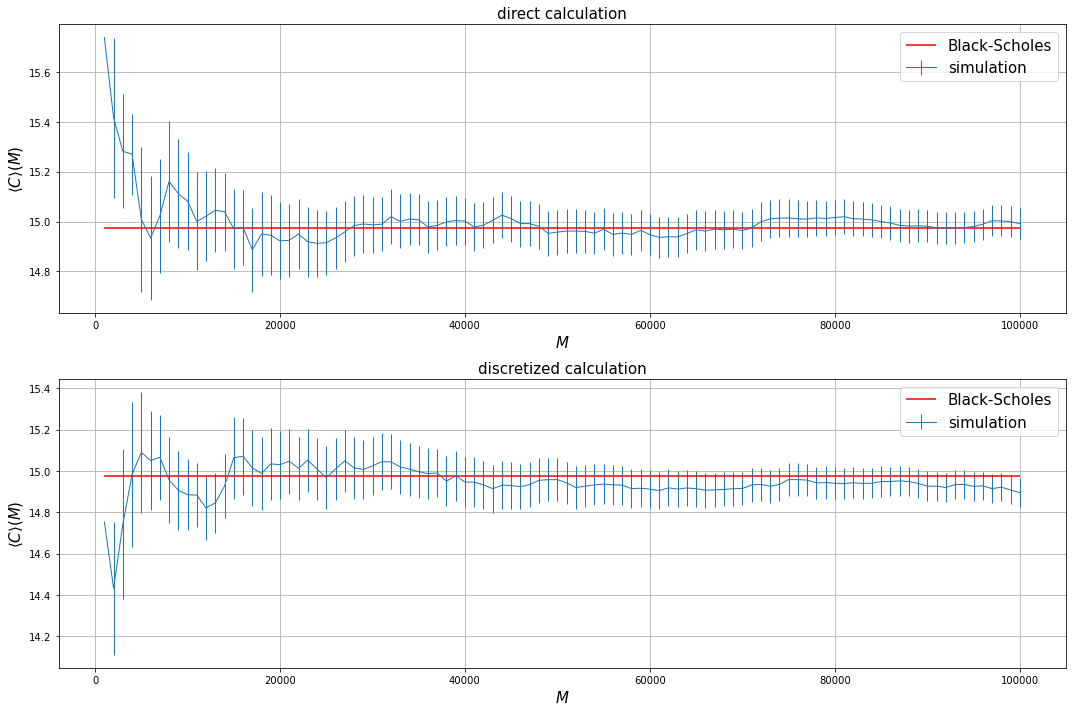

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

M, C_direct, C_direct_error = np.loadtxt("data/C_direct_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
M, C_discretized, C_discretized_error = np.loadtxt("data/C_discretized_prog.txt", delimiter=',', skiprows=1, unpack = 'True')

ax[0].errorbar(M, C_direct, C_direct_error, lw=1, label='simulation')
ax[0].hlines(call, min(M), max(M), color='r', label='Black-Scholes')
ax[0].set_xlabel(r"$M$", size=15)
ax[0].set_ylabel(r"$\langle C \rangle(M)$", size=15)
ax[0].set_title("direct calculation", size=15)
ax[0].grid()
ax[0].legend(fontsize=15)

ax[1].errorbar(M, C_discretized, C_discretized_error, lw=1, label='simulation')
ax[1].hlines(call, min(M), max(M), color='r', label='Black-Scholes')
ax[1].set_xlabel(r"$M$", size=15)
ax[1].set_ylabel(r"$\langle C \rangle(M)$", size=15)
ax[1].set_title("discretized calculation", size=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.tight_layout()
plt.show()

Finally, we plot the progressive mean of the simulated put option price $\langle P \rangle$ against the number of throws $M$ for both methods. Again, the result of the simulation conerges quickly to its expected value.

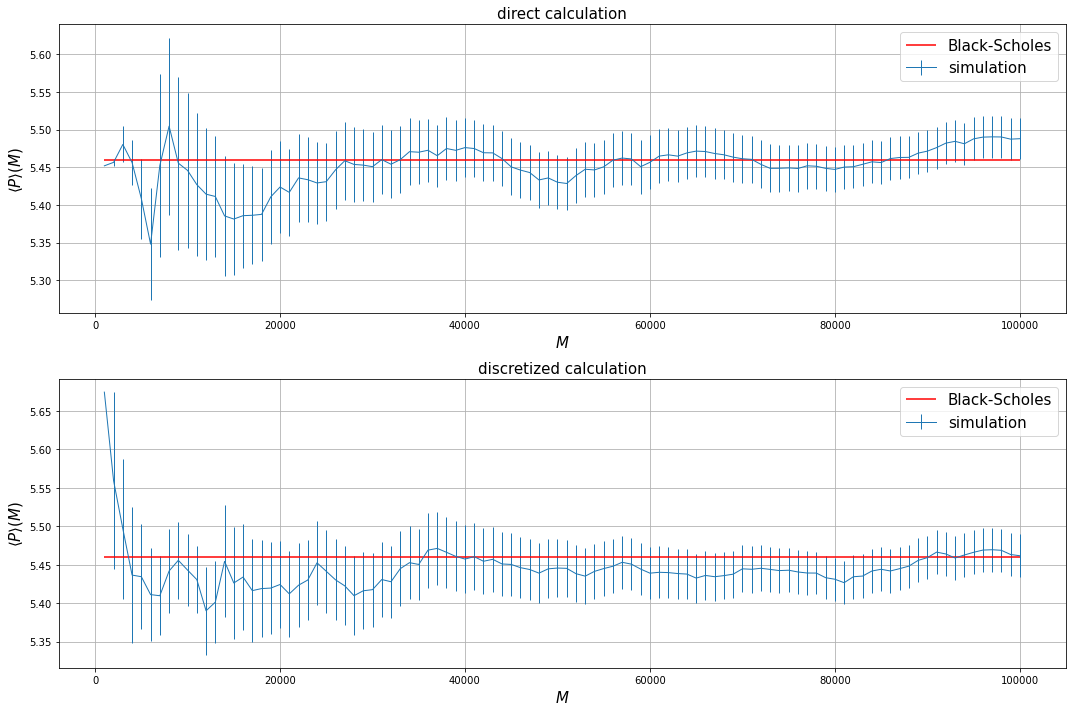

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

M, P_direct, P_direct_error = np.loadtxt("data/P_direct_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
M, P_discretized, P_discretized_error = np.loadtxt("data/P_discretized_prog.txt", delimiter=',', skiprows=1, unpack = 'True')

ax[0].errorbar(M, P_direct, P_direct_error, lw=1, label='simulation')
ax[0].hlines(put, min(M), max(M), color='r', label='Black-Scholes')
ax[0].set_xlabel(r"$M$", size=15)
ax[0].set_ylabel(r"$\langle P \rangle(M)$", size=15)
ax[0].set_title("direct calculation", size=15)
ax[0].grid()
ax[0].legend(fontsize=15)

ax[1].errorbar(M, P_discretized, P_discretized_error, lw=1, label='simulation')
ax[1].hlines(put, min(M), max(M), color='r', label='Black-Scholes')
ax[1].set_xlabel(r"$M$", size=15)
ax[1].set_ylabel(r"$\langle P \rangle(M)$", size=15)
ax[1].set_title("discretized calculation", size=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.tight_layout()
plt.show()